# Displacements due to pressure variations in reservoir

This code aims at reproducing the results presented by Muñoz and Roehl (2017, fig 4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

In [2]:
import compaction as cp

In [3]:
# Define the model
model = cp.prism_layer_rectangular([-20, 20, -20, 20], (4, 4), 5, -5)

In [4]:
# Pressure variation (in MPa)
DP = np.zeros(len(model)) - 10

In [5]:
# Young’s modulus (in MPa)
young = 80000

# Poisson coefficient
poisson = 0.25

In [6]:
# Define computation points on a grid at the center of the prism (at z = 0m)
shape = (61, 61)
y = np.linspace(-30, 30, shape[0])
x = np.linspace(-30, 30, shape[1])
y, x = np.meshgrid(y, x)
y = y.ravel()
x = x.ravel()
z = np.zeros_like(x)
coordinates = np.vstack([y, x, z])

In [7]:
coordinates.shape

(3, 3721)

### Compute the displacement components

In [8]:
# Compute the x-component
d_x1 = cp.displacement(coordinates, model, DP, poisson, young, field='d_x1')

d_x2 = cp.displacement(coordinates, model, DP, poisson, young, field='d_x2')

d_xz2 = cp.displacement(coordinates, model, DP, poisson, young, field='d_xz2')

In [9]:
displacement_x = d_x1 + (3 - 4*poisson)*d_x2 + d_xz2

In [10]:
# Compute the y-component
d_y1 = cp.displacement(coordinates, model, DP, poisson, young, field='d_y1')

d_y2 = cp.displacement(coordinates, model, DP, poisson, young, field='d_y2')

d_yz2 = cp.displacement(coordinates, model, DP, poisson, young, field='d_yz2')

In [11]:
displacement_y = d_y1 + (3 - 4*poisson)*d_y2 + d_yz2

In [12]:
# Compute the z-component
d_z1 = cp.displacement(coordinates, model, DP, poisson, young, field='d_z1')

d_z2 = cp.displacement(coordinates, model, DP, poisson, young, field='d_z2')

d_zz2 = cp.displacement(coordinates, model, DP, poisson, young, field='d_zz2')

In [13]:
displacement_z = d_z1 - (3 - 4*poisson)*d_z2 + d_zz2

### Results obtained for x-component

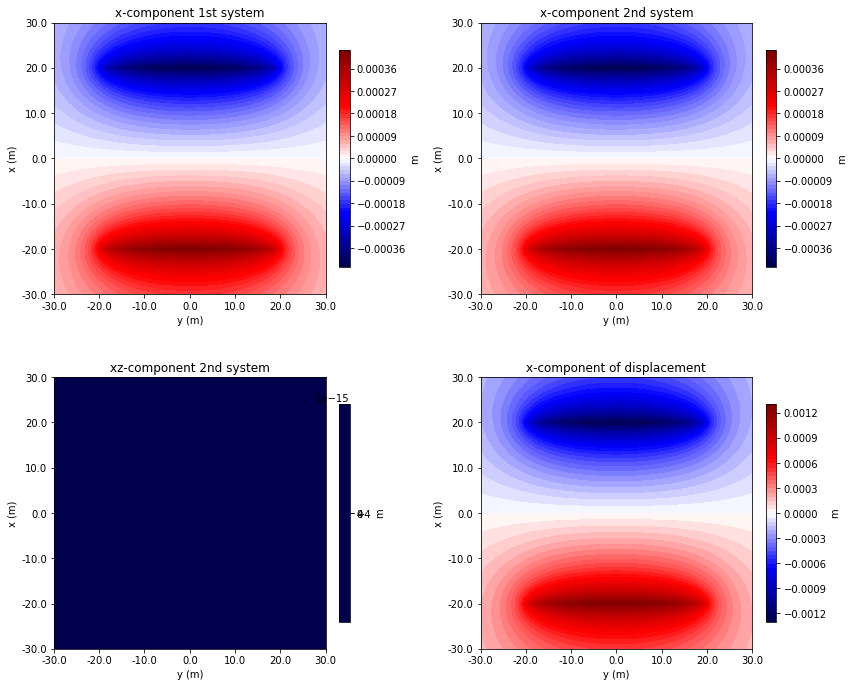

In [14]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12,10))

ax[0,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(d_x1))
img = ax[0,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  d_x1.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,0], pad=0.04, shrink=0.73, label="m")
ax[0,0].set_title("x-component 1st system")

ax[0,0].set_xticklabels(ax[0,0].get_xticks())
ax[0,0].set_yticklabels(ax[0,0].get_yticks())
ax[0,0].set_xlabel("y (m)")
ax[0,0].set_ylabel("x (m)")

ax[0,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(d_x2))
img = ax[0,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  d_x2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,1], pad=0.04, shrink=0.73, label="m")
ax[0,1].set_title("x-component 2nd system")

ax[0,1].set_xticklabels(ax[0,1].get_xticks())
ax[0,1].set_yticklabels(ax[0,1].get_yticks())
ax[0,1].set_xlabel("y (m)")
ax[0,1].set_ylabel("x (m)")

ax[1,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(d_xz2))
img = ax[1,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  d_xz2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,0], pad=0.04, shrink=0.73, label="m")
ax[1,0].set_title("xz-component 2nd system")

ax[1,0].set_xticklabels(ax[1,0].get_xticks())
ax[1,0].set_yticklabels(ax[1,0].get_yticks())
ax[1,0].set_xlabel("y (m)")
ax[1,0].set_ylabel("x (m)")

ax[1,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(displacement_x))
img = ax[1,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  displacement_x.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,1], pad=0.04, shrink=0.73, label="m")
ax[1,1].set_title("x-component of displacement")

ax[1,1].set_xticklabels(ax[1,1].get_xticks())
ax[1,1].set_yticklabels(ax[1,1].get_yticks())
ax[1,1].set_xlabel("y (m)")
ax[1,1].set_ylabel("x (m)")


plt.tight_layout()
plt.show()

### Comparison of computed x-component on the profile y = 0 m

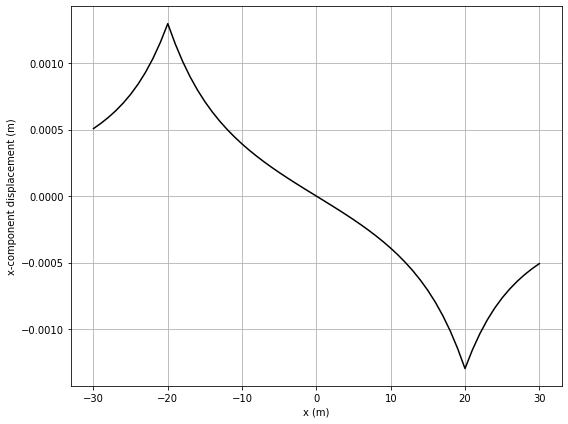

In [15]:
# Plot the results on a profile at y = 0m
profile = (y == 0)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(x[profile], displacement_x[profile], 'k-')
ax.set_xlabel("x (m)")
ax.set_ylabel("x-component displacement (m)")
plt.grid()
plt.tight_layout()
plt.show()

### Results obtained for z-component

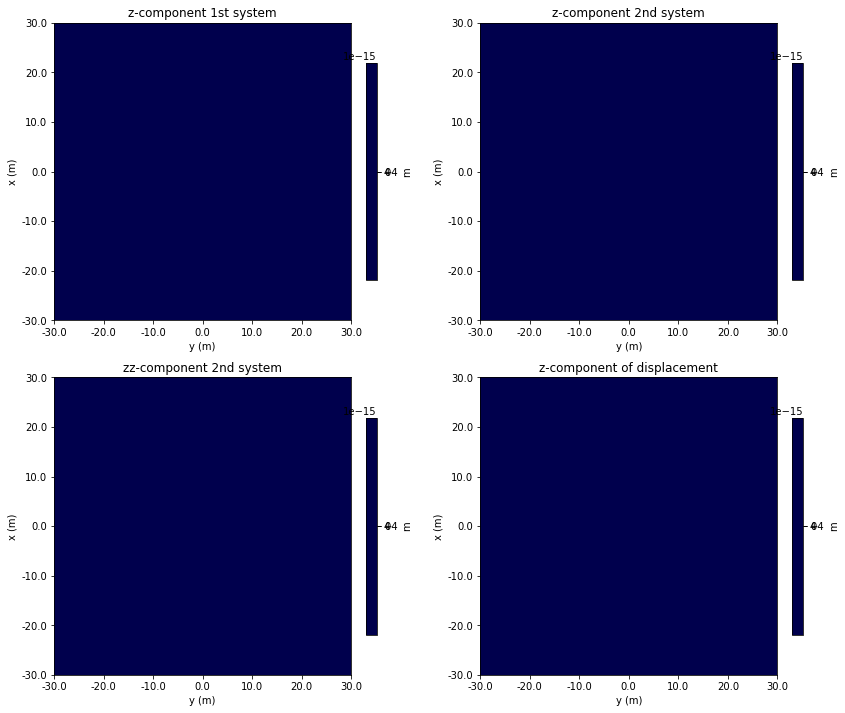

In [16]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(12,10))

ax[0,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(d_z1))
img = ax[0,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  d_z1.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,0], pad=0.04, shrink=0.73, label="m")
ax[0,0].set_title("z-component 1st system")

ax[0,0].set_xticklabels(ax[0,0].get_xticks())
ax[0,0].set_yticklabels(ax[0,0].get_yticks())
ax[0,0].set_xlabel("y (m)")
ax[0,0].set_ylabel("x (m)")

ax[0,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(d_z2))
img = ax[0,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  d_z2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[0,1], pad=0.04, shrink=0.73, label="m")
ax[0,1].set_title("z-component 2nd system")

ax[0,1].set_xticklabels(ax[0,1].get_xticks())
ax[0,1].set_yticklabels(ax[0,1].get_yticks())
ax[0,1].set_xlabel("y (m)")
ax[0,1].set_ylabel("x (m)")

ax[1,0].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(d_zz2))
img = ax[1,0].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  d_zz2.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,0], pad=0.04, shrink=0.73, label="m")
ax[1,0].set_title("zz-component 2nd system")

ax[1,0].set_xticklabels(ax[1,0].get_xticks())
ax[1,0].set_yticklabels(ax[1,0].get_yticks())
ax[1,0].set_xlabel("y (m)")
ax[1,0].set_ylabel("x (m)")

ax[1,1].set_aspect("equal")
# Get the maximum absolute value so we can center the colorbar on zero
maxabs = np.max(np.abs(displacement_z))
img = ax[1,1].contourf(coordinates[0].reshape(shape), 
                  coordinates[1].reshape(shape), 
                  displacement_z.reshape(shape), 
                  60, vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(img, ax=ax[1,1], pad=0.04, shrink=0.73, label="m")
ax[1,1].set_title("z-component of displacement")

ax[1,1].set_xticklabels(ax[1,1].get_xticks())
ax[1,1].set_yticklabels(ax[1,1].get_yticks())
ax[1,1].set_xlabel("y (m)")
ax[1,1].set_ylabel("x (m)")


plt.tight_layout()
plt.show()